In [8]:
%matplotlib inline
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from pylab import rcParams
rcParams['figure.figsize'] = 12, 6
from matplotlib import pyplot as plt

In [41]:
!pip install scikit-learn
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/content/author_ru_utf.csv')

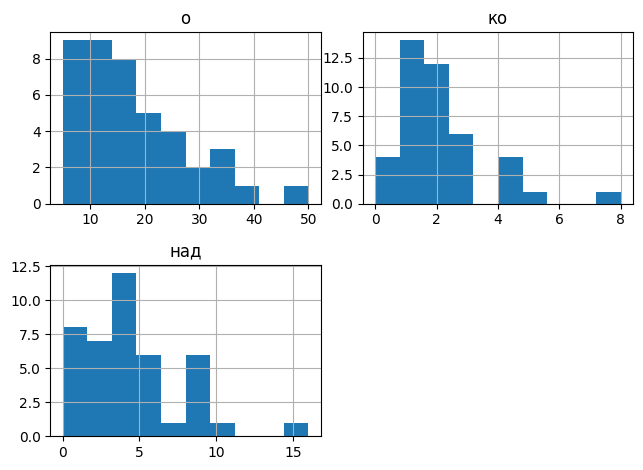

In [2]:
df[df["Author"] == "ГогольНВ"][["о", "ко", "над"]].hist(bins=10)
plt.tight_layout()

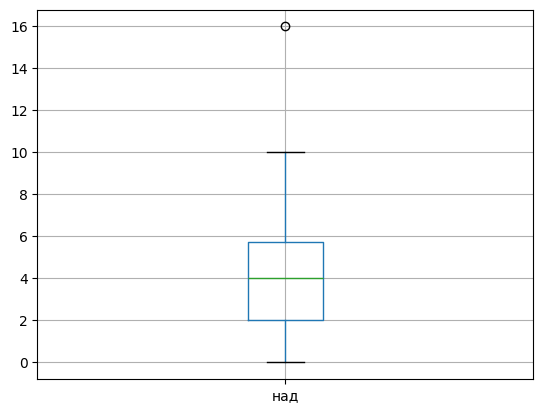

In [3]:
df[df["Author"] == "ГогольНВ"][["над"]].boxplot();

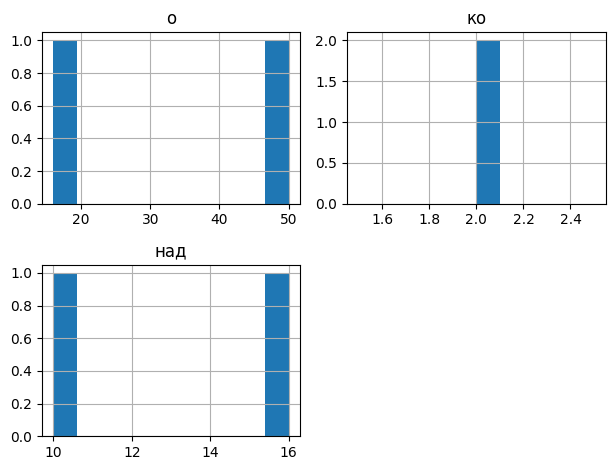

In [4]:
data = df[(df["над"] >= 10) & (df["над"] <= 50)]
data[data["Author"] == "ГогольНВ"][["о", "ко", "над"]].hist(bins=10)
plt.tight_layout()

In [33]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

train = data[["что", "на", "и"]]
target = data["document"]

model = gnb.fit(train, target)
predict = model.predict(train)
print(data.shape[0],
     (target == predict).sum() / data.shape[0])

predict

30 1.0


array(['ГогольНВ_ВечераЧ2_3.txt', 'ГогольНВ_НевскПросп_0.txt',
       'ГончаровИА_Обломов_20.txt', 'ГончаровИА_Обломов_5.txt',
       'ГончаровИА_Обрыв_2.txt', 'ГончаровИА_Обрыв_22.txt',
       'ГончаровИА_Обрыв_23.txt', 'ГончаровИА_Обрыв_25.txt',
       'ГончаровИА_Обрыв_26.txt', 'ГончаровИА_Обрыв_28.txt',
       'ГончаровИА_Обрыв_7.txt', 'ГончаровИА_Обрыв_9.txt',
       'ГончаровИА_ОбыкнИстор_7.txt', 'ДостоевскийФМ_Бесы_12.txt',
       'ДостоевскийФМ_Бесы_18.txt', 'ДостоевскийФМ_БратьяКарамаз_15.txt',
       'ДостоевскийФМ_ЗапискиИзМёртвД_3.txt',
       'ДостоевскийФМ_Идиот_20.txt', 'ДостоевскийФМ_Идиот_21.txt',
       'ДостоевскийФМ_НеточкаНезв_1.txt',
       'ДостоевскийФМ_Подросток_14.txt', 'ДостоевскийФМ_СелоСтеп_1.txt',
       'ДостоевскийФМ_Хозяйка_2.txt', 'ТолстойЛН_АннаКар_16.txt',
       'ТолстойЛН_АннаКар_6.txt', 'ТолстойЛН_ВойнаМир_10.txt',
       'ТолстойЛН_ВойнаМир_24.txt', 'ТолстойЛН_ВойнаМир_5.txt',
       'ТолстойЛН_Воскр_1.txt', 'ТолстойЛН_Юность_4.txt'], dtype='<U35

In [46]:
features = data.pivot_table(index='document', columns='Author', values='и', fill_value=0)

In [50]:
targets = data.drop_duplicates('document')[['document', 'Author']]
targets = targets.set_index('document').loc[features.index]['Author']

In [51]:
from sklearn.preprocessing import LabelEncoder

# Кодируем авторов
le = LabelEncoder()
target_encoded = le.fit_transform(targets)

gnb = GaussianNB()
model = gnb.fit(features, target_encoded)

In [52]:
predict = model.predict(features)
print(f"Accuracy: {(target_encoded == predict).sum() / len(predict)}")

Accuracy: 1.0


In [53]:
cnf_matrix = confusion_matrix(target_encoded, predict)
class_names = le.classes_

In [36]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(target, predict)

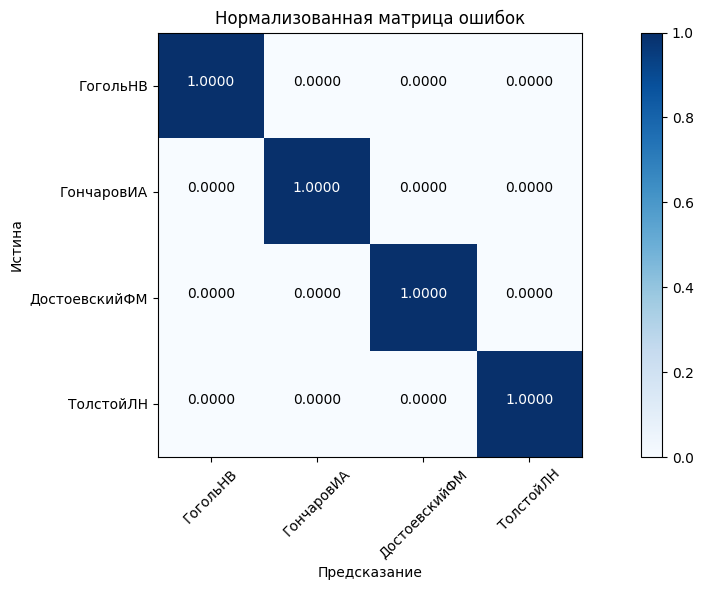

In [54]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Матрица неточностей', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.4f' if normalize else 'd'
    thresh = cm.min() + (cm.max() - cm.min()) * 2 / 3.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('Истина')
    plt.xlabel('Предсказание')
    plt.tight_layout()

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Нормализованная матрица ошибок')
plt.show()

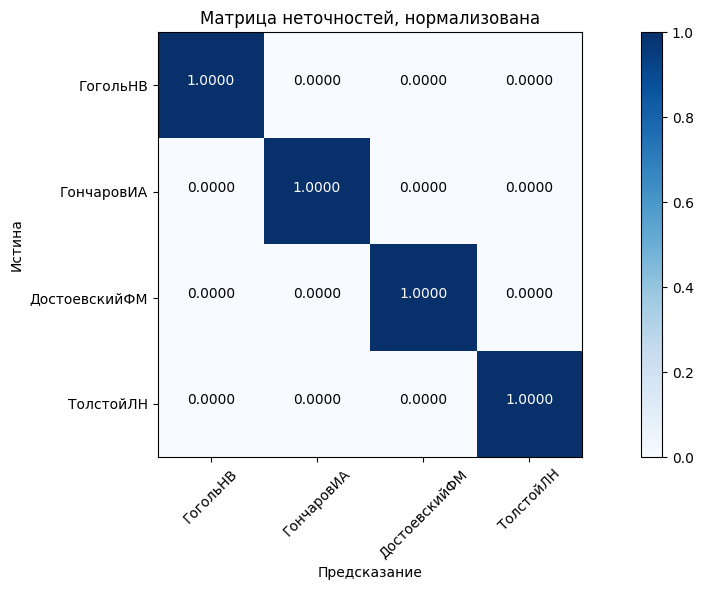

In [55]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Матрица неточностей, нормализована')
plt.show()

In [56]:
import sklearn.datasets
X, y = sklearn.datasets.fetch_20newsgroups(
    shuffle=True, subset='all', random_state=42, return_X_y=True)

In [64]:
from sklearn.feature_extraction.text import CountVectorizer

In [67]:
from sklearn.naive_bayes import MultinomialNB

In [68]:
texts = df['document'].tolist()
authors = df['Author'].tolist()

vectorizer = CountVectorizer(stop_words='english', max_features=200)
X_vec = vectorizer.fit_transform(texts)

clf = MultinomialNB()
clf.fit(X_vec, authors)

predicted_probs = clf.predict_proba(X_vec)
predictions = clf.predict(X_vec)

accuracy = np.mean(predictions == np.array(authors))
print(f"Точность: {accuracy}")

Точность: 0.5263157894736842
